In [1]:
from sklearn import svm, datasets
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# 加载数据集
iris = datasets.load_iris()

feature = iris['data']
target = iris['target']
feature_names = iris['feature_names']
target_names = iris['target_names']

print(feature.shape)
print(target.shape)
print(feature_names)
print(target_names)

(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [17]:
# 为了方便，降维打击
feature = feature[:,1:3]
feature_names = feature_names[1:3]

print(feature.shape)
print(feature_names)

(150, 2)
['sepal width (cm)', 'petal length (cm)']


In [18]:
# 获取每个类别的索引
indices_set = np.where(target == 0)[0]
indices_ver = np.where(target == 1)[0]
indices_vir = np.where(target == 2)[0]

print(indices_set.shape)
print(indices_ver.shape)
print(indices_vir.shape)

(50,)
(50,)
(50,)


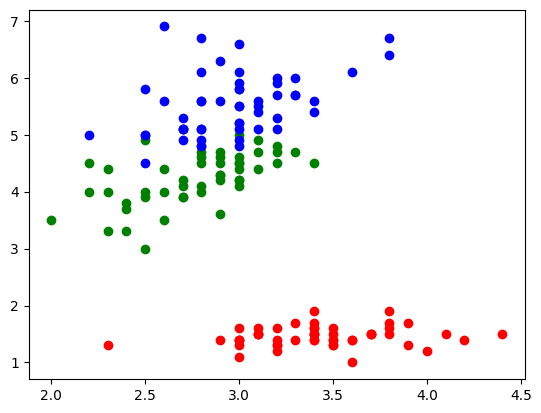

In [19]:
# 可视化数据
plt.plot(feature[indices_set][:,0], feature[indices_set][:,1], 'ro')
plt.plot(feature[indices_ver][:,0], feature[indices_ver][:,1], 'go')
plt.plot(feature[indices_vir][:,0], feature[indices_vir][:,1], 'bo')
plt.xlabel = feature_names[0]
plt.ylabel = feature_names[1]
plt.show()

In [20]:
# 训练模型
svm_model = svm.LinearSVC(dual='auto')
svm_model.fit(feature, target)

svm_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': 'auto',
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [21]:
# 获取模型参数
coef = svm_model.coef_
intercept = svm_model.intercept_

print(coef.shape)
print(coef)
print(intercept.shape)
print(intercept)

(3, 2)
[[ 0.6951567  -0.88847025]
 [-0.91668564  0.03426503]
 [-1.19686801  1.41382872]]
(3,)
[ 0.24521522  2.31409205 -3.41750075]


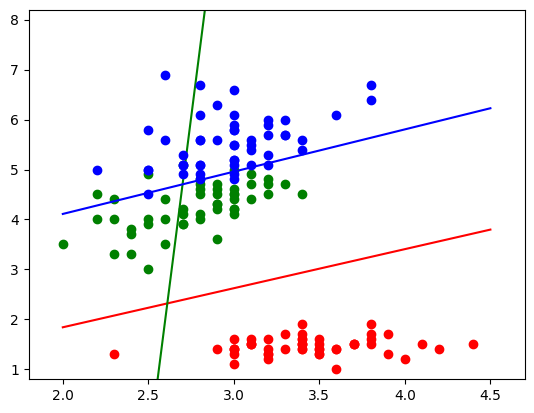

In [27]:
# 可视化划分超平面
hp_x = np.linspace(2.0, 4.5, 50)

hp_y0 = (-intercept[0] - coef[0,0] * hp_x) / coef[0,1]
hp_y1 = (-intercept[1] - coef[1,0] * hp_x) / coef[1,1]
hp_y2 = (-intercept[2] - coef[2,0] * hp_x) / coef[2,1]

plt.plot(feature[indices_set][:,0], feature[indices_set][:,1], 'ro')
plt.plot(hp_x, hp_y0, 'r-')
plt.plot(feature[indices_ver][:,0], feature[indices_ver][:,1], 'go')
plt.plot(hp_x, hp_y1, 'g-')
plt.plot(feature[indices_vir][:,0], feature[indices_vir][:,1], 'bo')
plt.plot(hp_x, hp_y2, 'b-')
plt.xlabel = feature_names[0]
plt.ylabel = feature_names[1]
plt.xlim(1.8, 4.7)
plt.ylim(0.8, 8.2)
plt.show()